In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import datetime as dt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

In [2]:
gen_1=pd.read_csv('/Users/yuyizhang/Documents/forecasting/Energy_Data/Solar Power_data/Plant_1_Generation_Data.csv')
gen_1.drop('PLANT_ID',1,inplace=True)
sens_1= pd.read_csv('/Users/yuyizhang/Documents/forecasting/Energy_Data/Solar Power_data/Plant_1_Weather_Sensor_Data.csv')
sens_1.drop('PLANT_ID',1,inplace=True)

In [3]:
#format datetime
gen_1['DATE_TIME']= pd.to_datetime(gen_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
sens_1['DATE_TIME']= pd.to_datetime(sens_1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

In [4]:
gen_1

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [5]:
sens_1

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...
3177,2020-06-17 22:45:00,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [6]:
sens_1.drop('SOURCE_KEY',1,inplace=True)

# Feature creation

In [7]:
df_plan1 = pd.merge(gen_1,sens_1,how = 'outer',on = ['DATE_TIME'])
df_plan1 = df_plan1.dropna(axis = 0, how = 'any')
df_plan1

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


In [8]:
class_mapping = {'1BY6WEcLGh8j5v7':0, '1IF53ai7Xc0U56Y':1, '3PZuoBAID5Wc2HD':2,
                 '7JYdWkrLSPkdwr4':3, 'McdE0feGgRqW7Ca':4, 'VHMLBKoKgIrUVDU':5,
                 'WRmjgnKYAwPKWDb':6, 'ZnxXDlPa8U1GXgE':7, 'ZoEaEvLYb1n2sOq':8,
                 'adLQvlD726eNBSB':9, 'bvBOhCH3iADSZry':10, 'iCRJl6heRkivqQ3':11,
                 'ih0vzX44oOqAx2f':12, 'pkci93gMrogZuBj':13, 'rGa61gmuvPhdLxV':14,
                 'sjndEbLyjtCKgGv':15, 'uHbuxQJl8lW7ozc':16, 'wCURE6d3bPkepu2':17,
                 'z9Y9gH1T5YWrNuG':18, 'zBIq5rxdHJRwDNY':19, 'zVJPv84UY57bAof':20,}

df_plan1['SOURCE_KEY'] = df_plan1['SOURCE_KEY'].map(class_mapping)

In [9]:
df_plan1

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1.0,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,2.0,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,3.0,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4.0,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,16.0,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68774,2020-06-17 23:45:00,17.0,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68775,2020-06-17 23:45:00,18.0,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68776,2020-06-17 23:45:00,19.0,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


In [10]:
# Below function extracts date related features from datetime
def create_date_featues(df):

    df['Year'] = pd.to_datetime(df_plan1['DATE_TIME']).dt.year
    df['Month'] = pd.to_datetime(df_plan1['DATE_TIME']).dt.month
    df['Day'] = pd.to_datetime(df_plan1['DATE_TIME']).dt.day
    df['Hour'] = pd.to_datetime(df_plan1['DATE_TIME']).dt.hour
    df['Minute'] = pd.to_datetime(df_plan1['DATE_TIME']).dt.minute
    
    return df

In [11]:
df_plan1=create_date_featues(df_plan1)
df_plan1.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Year,Month,Day,Hour,Minute
0,2020-05-15,0.0,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020,5,15,0,0
1,2020-05-15,1.0,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2020,5,15,0,0
2,2020-05-15,2.0,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,2020,5,15,0,0
3,2020-05-15,3.0,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,2020,5,15,0,0
4,2020-05-15,4.0,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,2020,5,15,0,0


In [12]:
train_df_plan1 = df_plan1[df_plan1['DATE_TIME']<'2020-06-09 00:00']
test_df_plan1 = df_plan1[df_plan1['DATE_TIME']>='2020-06-09 00:00']

x_df_train = train_df_plan1.drop(columns={'DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD'},axis=1)
y_df_train = train_df_plan1.loc[:,['DAILY_YIELD']]

x_df_val=test_df_plan1.drop(columns={'DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD'},axis=1)
y_df_val=test_df_plan1.loc[:,['DAILY_YIELD']]

# LightGBM

In [13]:
import lightgbm as lgb

model_lgb_df = lgb.LGBMRegressor(objective='regression')
model_lgb_df.fit(x_df_train, y_df_train,eval_metric="rmse", 
    eval_set=[(x_df_train, y_df_train)], 
    verbose=True, 
    early_stopping_rounds = 1000)

[1]	training's rmse: 2926.37	training's l2: 8.56366e+06
Training until validation scores don't improve for 1000 rounds
[2]	training's rmse: 2671.13	training's l2: 7.13494e+06
[3]	training's rmse: 2444.82	training's l2: 5.97714e+06
[4]	training's rmse: 2245.76	training's l2: 5.04342e+06
[5]	training's rmse: 2067.05	training's l2: 4.27269e+06
[6]	training's rmse: 1912.15	training's l2: 3.65634e+06
[7]	training's rmse: 1772.06	training's l2: 3.14021e+06
[8]	training's rmse: 1645.9	training's l2: 2.70897e+06
[9]	training's rmse: 1532.59	training's l2: 2.34882e+06
[10]	training's rmse: 1433.09	training's l2: 2.05374e+06
[11]	training's rmse: 1345.25	training's l2: 1.80969e+06
[12]	training's rmse: 1268.76	training's l2: 1.60975e+06
[13]	training's rmse: 1206.14	training's l2: 1.45478e+06
[14]	training's rmse: 1146.53	training's l2: 1.31453e+06
[15]	training's rmse: 1094.99	training's l2: 1.199e+06
[16]	training's rmse: 1051.2	training's l2: 1.10502e+06
[17]	training's rmse: 1010.85	training

LGBMRegressor(objective='regression')

In [14]:
pred_lgb_df=model_lgb_df.predict(x_df_val)
r2_score(y_df_val,pred_lgb_df)

0.8756945849764105

In [15]:
np.sqrt(mean_squared_error(y_df_val,pred_lgb_df))

1047.7579134243667

# Xgboost

In [16]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance

model_xgb = XGBRegressor(
    max_depth=8,
    booster = "gbtree",
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,
    seed=42,
    objective='reg:linear')

model_xgb.fit(
    x_df_train, 
    y_df_train, 
    eval_metric="rmse", 
    eval_set=[(x_df_train, y_df_train),(x_df_val,y_df_val)], 
    verbose=True, 
    early_stopping_rounds = 100)

[12:25:42] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3333.27026	validation_1-rmse:3178.83789
[1]	validation_0-rmse:2479.01856	validation_1-rmse:2287.85864
[2]	validation_0-rmse:1967.85193	validation_1-rmse:1802.74817
[3]	validation_0-rmse:1642.63586	validation_1-rmse:1545.46875
[4]	validation_0-rmse:1439.07886	validation_1-rmse:1438.68188
[5]	validation_0-rmse:1254.83801	validation_1-rmse:1244.73084
[6]	validation_0-rmse:1181.57227	validation_1-rmse:1193.44800
[7]	validation_0-rmse:1099.74243	validation_1-rmse:1057.97449
[8]	validation_0-rmse:1064.70422	validation_1-rmse:1047.48669
[9]	validation_0-rmse:1032.51733	validation_1-rmse:1001.73578
[10]	validation_0-rmse:1005.35523	validation_1-rmse:977.16937
[11]	validation_0-rmse:979.49042	validation_1-rmse:971.27405
[12]	validation_0-rmse:968.55774	validation_1-rmse:970.87116
[13]	validation_0-rmse:962.19159	validation_1-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=300, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [17]:
pred_xgb=model_xgb.predict(x_df_val)
r2_score(y_df_val,pred_xgb)

0.8959315124564455

In [18]:
np.sqrt(mean_squared_error(y_df_val,pred_xgb))

958.6841498028144

# Catboost

In [19]:
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor(depth=10, learning_rate=0.1, eval_metric='RMSE')

model_cat.fit(x_df_train, y_df_train, 
    eval_set=[(x_df_train, y_df_train)], 
    verbose=True, 
    early_stopping_rounds = 100)

0:	learn: 2960.9026321	test: 2960.9026321	best: 2960.9026321 (0)	total: 66.8ms	remaining: 1m 6s
1:	learn: 2727.7997014	test: 2727.7997014	best: 2727.7997014 (1)	total: 87.8ms	remaining: 43.8s
2:	learn: 2523.4538151	test: 2523.4538151	best: 2523.4538151 (2)	total: 104ms	remaining: 34.4s
3:	learn: 2347.9551087	test: 2347.9551087	best: 2347.9551087 (3)	total: 120ms	remaining: 30s
4:	learn: 2197.5392398	test: 2197.5392398	best: 2197.5392398 (4)	total: 136ms	remaining: 27s
5:	learn: 2051.6281325	test: 2051.6281325	best: 2051.6281325 (5)	total: 152ms	remaining: 25.2s
6:	learn: 1935.8203220	test: 1935.8203220	best: 1935.8203220 (6)	total: 172ms	remaining: 24.4s
7:	learn: 1835.9080710	test: 1835.9080710	best: 1835.9080710 (7)	total: 191ms	remaining: 23.7s
8:	learn: 1733.1118580	test: 1733.1118580	best: 1733.1118580 (8)	total: 213ms	remaining: 23.5s
9:	learn: 1643.3285873	test: 1643.3285873	best: 1643.3285873 (9)	total: 234ms	remaining: 23.1s
10:	learn: 1565.5122935	test: 1565.5122935	best: 156

In [20]:
pred_cat=model_cat.predict(x_df_val)
r2_score(y_df_val,pred_cat)

0.9044910876631108

In [21]:
np.sqrt(mean_squared_error(y_df_val,pred_cat))

918.4126888384623

# Explanation
# SHAP for Lightgbm

In [22]:
import shap
explainer_lgb = shap.TreeExplainer(model_lgb_df)
shap_values_lgb = explainer_lgb(x_df_train)

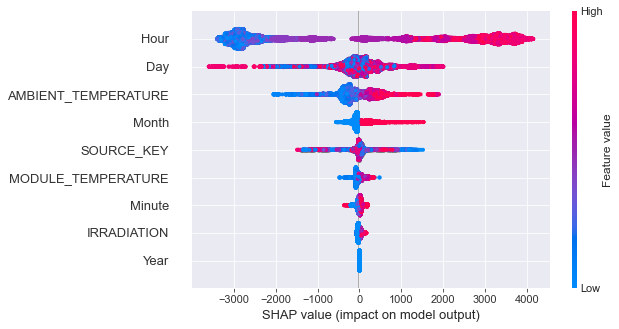

In [23]:
shap.summary_plot(shap_values_lgb)

# SHAP for Xgboost

In [24]:
explainer_xgb = shap.TreeExplainer(model_xgb)
shap_values_xgb = explainer_xgb(x_df_train)

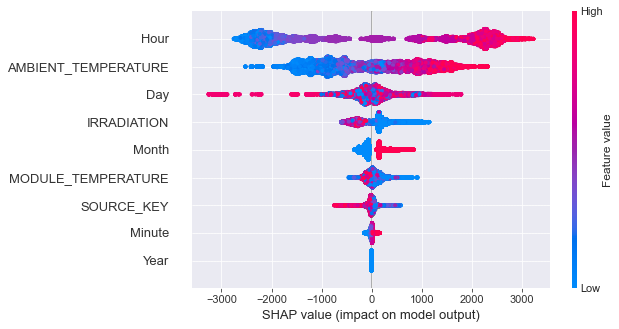

In [25]:
shap.summary_plot(shap_values_xgb)

# SHAP for Catboost

In [26]:
explainer_cat = shap.TreeExplainer(model_cat)
shap_values_cat = explainer_cat(x_df_train)

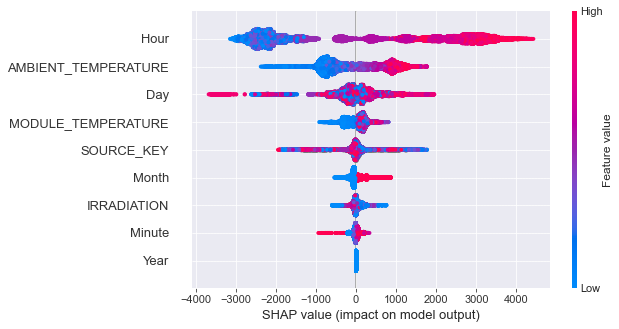

In [27]:
shap.summary_plot(shap_values_cat)